In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [31]:
data1 = pd.DataFrame([159.5, 120.7, 279], index=[1,2,'sz'], columns=['R'])
data2 = pd.DataFrame()
data2['U'] = [[3.3, 4.79, 6.36, 7.91, 9.6, 12.45],[10.5, 17.6, 22.2, 27.3, 33.6, 43.5]][0]
data2['I'] = [[3.3, 4.79, 6.36, 7.91, 9.6, 12.45],[10.5, 17.6, 22.2, 27.3, 33.6, 43.5]][1]
data2['I'] *= 1e-3

data1

,R
1,159.5
2,120.7
sz,279.0


In [32]:
data1['uR'] = [1.576, 1.2656, 3.232]

def calc_Dp_U(x):
    return 0.5/100 * x + 1*10e-3

def calc_Dp_I(x):
    return 1.2/100 * x + 1*100e-6

def calc_uB(Deltas):
    s = 0
    for D in Deltas:
        s += D**2 / 3
    return np.sqrt(s)


data2['uU'] = calc_uB([ calc_Dp_U(data2['U']) ])
data2['uI'] = calc_uB([ calc_Dp_I(data2['I']) ])
data1

,R,uR
1,159.5,1.5760
2,120.7,1.2656
sz,279.0,3.2320


In [33]:
R_12 = data1['R'].loc[1] + data1['R'].loc[2]
uR_12 = np.sqrt(data1['uR'].loc[1]**2 +  data1['uR'].loc[2]**2)
print(R_12, uR_12) #zrobić wykres
data2

280.2 2.0212667711116215


,U,I,uU,uI
0,3.30,0.0105,0.015300,0.000130
1,4.79,0.0176,0.019601,0.000180
2,6.36,0.0222,0.024133,0.000212
3,7.91,0.0273,0.028608,0.000247
4,9.60,0.0336,0.033486,0.000291
5,12.45,0.0435,0.041714,0.000359


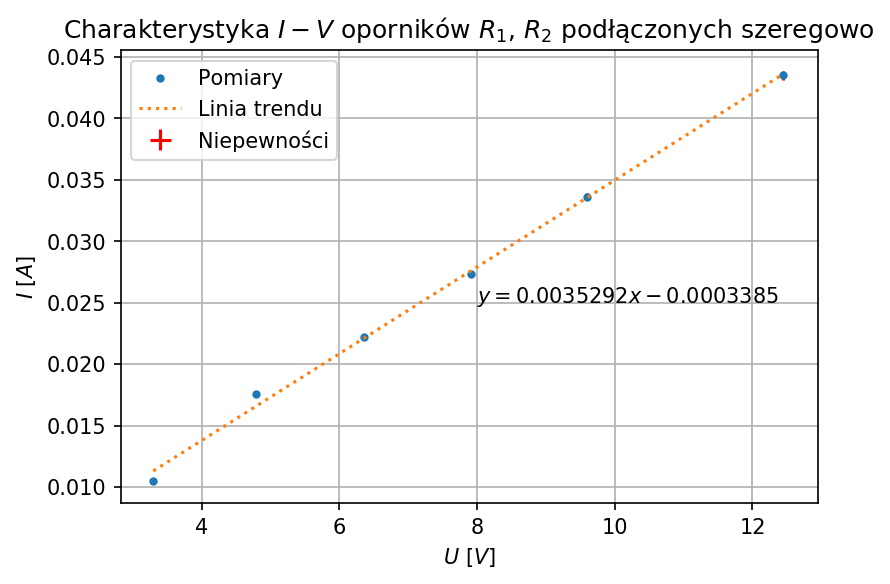

In [39]:
plt.rcParams['figure.dpi'] = 150
x = data2['U']
y = data2['I']
xerr = data2['uU']
yerr = data2['uI']

plt.plot(x,y, ".", label="Pomiary")
plt.errorbar(x=x, y=y, xerr=xerr, yerr=yerr, fmt=" ", label="Niepewności", color="Red")

p, V = np.polyfit(x,y, deg=1, cov=True)

R_lin = 1 / p[0]
uR_lin = np.sqrt((-1 / p[0]**2)**2 * V[0][0])

plt.plot(x, p[0]*x + p[1], ':', label="Linia trendu")
plt.text(8,0.025,"$y = {:.7f}x {:.7f} $".format(p[0], p[1]))

plt.grid(b=True)
plt.title("Charakterystyka $I-V$ oporników $R_1$, $R_2$ podłączonych szeregowo")
plt.xlabel("$U\ [V]$")
plt.ylabel("$I\ [A]$")
plt.legend()
plt.show()


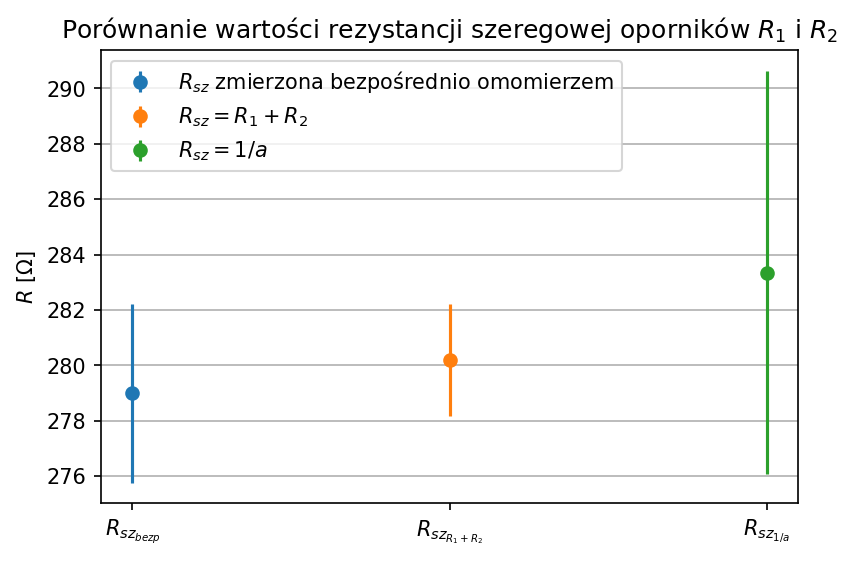

In [64]:
plt.rcParams['figure.dpi'] = 150

plt.errorbar(x=["$R_{sz_{bezp}}$"], y=data1['R'].loc['sz'], yerr=data1['uR'].loc['sz'], fmt="o", label="$R_{sz}$ zmierzona bezpośrednio omomierzem")
plt.errorbar(x=["$R_{sz_{R_1+R_2}}$"], y = R_12, yerr = uR_12, fmt="o", label="$R_{sz} = R_1 + R_2$")
plt.errorbar(x=["$R_{sz_{1/a}}$"], y = R_lin, yerr = uR_lin, fmt="o", label="$R_{sz} = 1/a$")

plt.grid(b=True, axis="y")
plt.title("Porównanie wartości rezystancji szeregowej oporników $R_1$ i $R_2$")
plt.ylabel("$R\ [\Omega]$")
plt.legend(loc=2)
plt.show()